In [2]:
import psycopg2

# Establecer la conexión con la base de datos
engine = psycopg2.connect(
    dbname="estudiantes",
    user="postgres",
    password="EstudiantesSSC",
    host="p2-ssc.ccesjqcligmw.us-east-1.rds.amazonaws.com",
    port="5432"
)
cursor = engine.cursor()

# Consulta para contar el número total de registros en la tabla "Estudiantes"
query_count = "SELECT COUNT(*) FROM Estudiantes;"
cursor.execute(query_count)
result_count = cursor.fetchone()
print("Número total de registros en la tabla:", result_count[0])

# Cerrar el cursor y la conexión con la base de datos
#cursor.close()
#engine.close()

Número total de registros en la tabla: 3630


In [3]:
import pandas as pd

# Consulta SQL
consulta1 = """
SELECT Gender,
       SUM(CASE WHEN Scholarship_holder = 1 AND Target = 1 THEN 1 ELSE 0 END) AS becados_graduados,
       SUM(CASE WHEN Scholarship_holder = 1 AND Target = 0 THEN 1 ELSE 0 END) AS becados_desertores,
       SUM(CASE WHEN Scholarship_holder = 0 AND Target = 1 THEN 1 ELSE 0 END) AS no_becados_graduados,
       SUM(CASE WHEN Scholarship_holder = 0 AND Target = 0 THEN 1 ELSE 0 END) AS no_becados_desertores
FROM Estudiantes
GROUP BY Gender;
"""

cursor.execute(consulta1)
graf1 = cursor.fetchall

# Ejecutar la consulta y obtener los resultados en un DataFrame
df = pd.read_sql_query(consulta1, engine)
df
# Cerrar la conexión con la base de datos
#cursor.close()


C:\Users\Personal\AppData\Local\Temp\ipykernel_24848\1389273810.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(consulta1, engine)


,gender,becados_graduados,becados_desertores,no_becados_graduados,no_becados_desertores
0,0,690,89,971,631
1,1,145,45,403,656


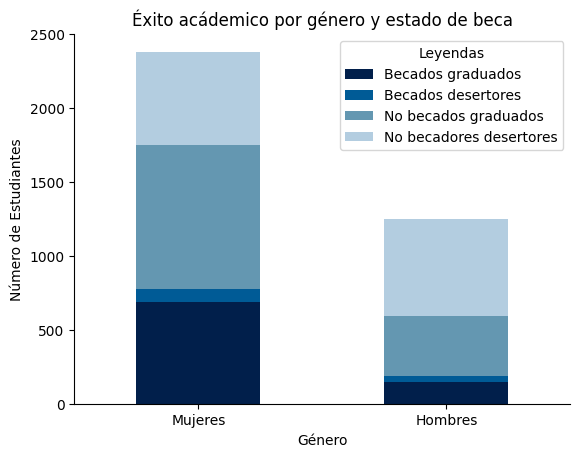

In [4]:
import matplotlib.pyplot as plt
# Crear una gráfica de barras
df.set_index('gender', inplace=True)

# Definir los colores personalizados
colores = ['#011f4b', '#005b96', '#6497b1', '#b3cde0']

# Crear la gráfica y especificar los colores personalizados
ax = df.plot(kind='bar', stacked=True, color=colores)

# Cambiar los nombres en los ejes (0 y 1 por "Mujeres" y "Hombres")
nombres_ejes = ["Mujeres", "Hombres"]
ax.set_xticklabels(nombres_ejes)
plt.xticks(rotation=0)

# Cambiar los nombres en las leyendas
ax.legend(["Becados graduados", "Becados desertores", "No becados graduados", "No becadores desertores"], title='Leyendas', loc='upper right')

plt.title('Éxito acádemico por género y estado de beca')
plt.xlabel('Género')
plt.ylabel('Número de Estudiantes')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [5]:
import pandas as pd

# Consulta SQL
consulta2 = """
SELECT Gender,
       SUM(CASE WHEN Debtor = 1 AND Target = 1 THEN 1 ELSE 0 END) AS deudores_graduados,
       SUM(CASE WHEN Debtor = 1 AND Target = 0 THEN 1 ELSE 0 END) AS deudores_desertores,
       SUM(CASE WHEN Debtor = 0 AND Target = 1 THEN 1 ELSE 0 END) AS no_deudores_graduados,
       SUM(CASE WHEN Debtor = 0 AND Target = 0 THEN 1 ELSE 0 END) AS no_deudores_desertores
FROM Estudiantes
GROUP BY Gender;
"""

cursor.execute(consulta2)
graf2 = cursor.fetchall

# Ejecutar la consulta y obtener los resultados en un DataFrame
df2 = pd.read_sql_query(consulta2, engine)
df2


C:\Users\Personal\AppData\Local\Temp\ipykernel_24848\1199918373.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = pd.read_sql_query(consulta2, engine)


,gender,deudores_graduados,deudores_desertores,no_deudores_graduados,no_deudores_desertores
0,0,79,163,1582,557
1,1,22,149,526,552


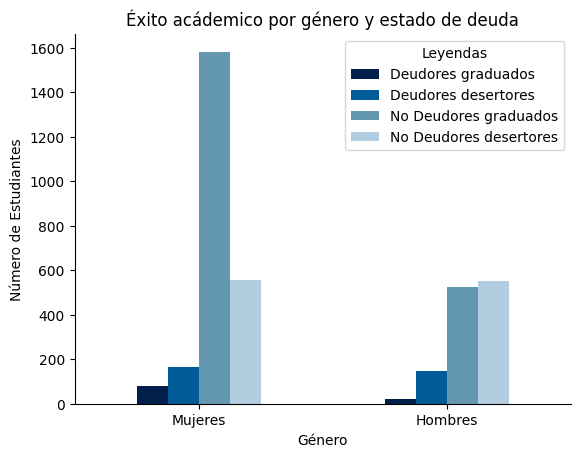

In [6]:
import matplotlib.pyplot as plt
# Crear una gráfica de barras
df2.set_index('gender', inplace=True)

# Definir los colores personalizados
colores = ['#011f4b', '#005b96', '#6497b1', '#b3cde0']

# Crear la gráfica y especificar los colores personalizados
ax = df2.plot(kind='bar', color=colores)

# Cambiar los nombres en los ejes (0 y 1 por "Mujeres" y "Hombres")
nombres_ejes = ["Mujeres", "Hombres"]
ax.set_xticklabels(nombres_ejes)
plt.xticks(rotation=0)

# Cambiar los nombres en las leyendas
ax.legend(["Deudores graduados", "Deudores desertores", "No Deudores graduados", "No Deudores desertores"], title='Leyendas', loc='upper right')

plt.title('Éxito acádemico por género y estado de deuda')
plt.xlabel('Género')
plt.ylabel('Número de Estudiantes')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.show()

In [7]:
import pandas as pd

# Consulta SQL
consulta3 = """
SELECT Gender, 
    SUM(CASE WHEN Curricular_units_1st_sem_grade = 0 THEN 1 ELSE 0 END) AS notas_1er_Sem_entre_0_y_5,
    SUM(CASE WHEN Curricular_units_1st_sem_grade = 1 THEN 1 ELSE 0 END) AS notas_1er_Sem_entre_5_y_10,
    SUM(CASE WHEN Curricular_units_1st_sem_grade = 2 THEN 1 ELSE 0 END) AS notas_1er_Sem_entre_10_y_15,
    SUM(CASE WHEN Curricular_units_1st_sem_grade = 3 THEN 1 ELSE 0 END) AS notas_1er_Sem_entre_15_y_20,
    SUM(CASE WHEN Curricular_units_2nd_sem_grade = 0 THEN 1 ELSE 0 END) AS notas_2do_Sem_entre_0_y_5,
    SUM(CASE WHEN Curricular_units_2nd_sem_grade = 1 THEN 1 ELSE 0 END) AS notas_2do_Sem_entre_5_y_10,
    SUM(CASE WHEN Curricular_units_2nd_sem_grade = 2 THEN 1 ELSE 0 END) AS notas_2do_Sem_entre_10_y_15,
    SUM(CASE WHEN Curricular_units_2nd_sem_grade = 3 THEN 1 ELSE 0 END) AS notas_2do_Sem_entre_15_y_20
FROM Estudiantes
GROUP BY Gender;
"""
cursor.execute(consulta3)
graf3 = cursor.fetchall

# Ejecutar la consulta y obtener los resultados en un DataFrame
df3 = pd.read_sql_query(consulta3, engine)
df3

C:\Users\Personal\AppData\Local\Temp\ipykernel_24848\3329264702.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3 = pd.read_sql_query(consulta3, engine)


,gender,notas_1er_sem_entre_0_y_5,notas_1er_sem_entre_5_y_10,notas_1er_sem_entre_10_y_15,notas_1er_sem_entre_15_y_20,notas_2do_sem_entre_0_y_5,notas_2do_sem_entre_5_y_10,notas_2do_sem_entre_10_y_15,notas_2do_sem_entre_15_y_20
0,0,295,31,1945,110,377,26,1844,134
1,1,352,30,819,48,425,25,751,48


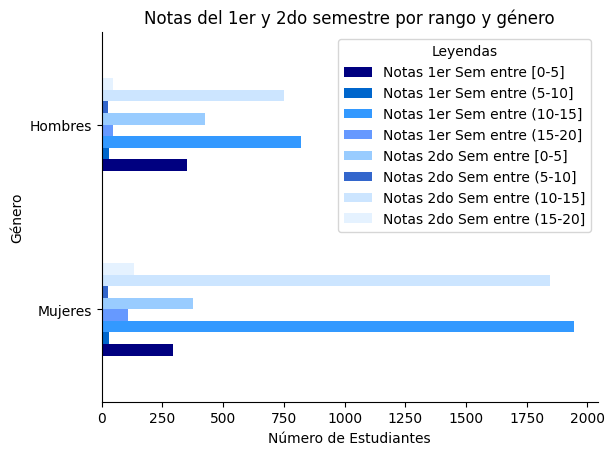

In [8]:
import matplotlib.pyplot as plt
# Crear una gráfica de barras
df3.set_index('gender', inplace=True)

# Definir los colores personalizados
#colores = ['#011f4b','#00008B', '#005b96', '#6497b1', '#6495ED', '#b3cde0', '#660066', '#be29ec']
colores = ['#000080', '#0066CC', '#3399FF', '#6699FF', '#99CCFF', '#3366CC', '#CCE5FF', '#E5F2FF']

# Crear la gráfica y especificar los colores personalizados
ax = df3.plot(kind='barh', color=colores)

# Cambiar los nombres en los ejes (0 y 1 por "Mujeres" y "Hombres")
nombres_ejes = ["Mujeres", "Hombres"]
ax.set_yticklabels(nombres_ejes)
plt.xticks(rotation=0)

# Cambiar los nombres en las leyendas
ax.legend(["Notas 1er Sem entre [0-5]", "Notas 1er Sem entre (5-10]", "Notas 1er Sem entre (10-15]", "Notas 1er Sem entre (15-20]", "Notas 2do Sem entre [0-5]", "Notas 2do Sem entre (5-10]", "Notas 2do Sem entre (10-15]", "Notas 2do Sem entre (15-20]"], title='Leyendas', loc='upper right')

plt.title('Notas del 1er y 2do semestre por rango y género')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Género')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)



plt.show()